In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import geometric_sampling as gs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from package_sampling.utils import inclusion_probabilities
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon
rng = gs.random.rng()

In [3]:
swiss_df = pd.read_csv('swiss.csv')
coords = swiss_df[['COORD_X', 'COORD_Y']].to_numpy()
N = len(coords)
n = 8
areas = swiss_df['AREA'].to_numpy()
areas = np.clip(areas, 1, 1000)
probs = inclusion_probabilities(areas, n)
# 
# probs = rng.unequal_probabilities(n, N)
# coords = coords[np.argsort(coords[:, 0])]
# probs = np.sort(rng.unequal_probabilities(n, N))

In [4]:
# N = 1000
# n = 5

# coords = rng.uniform_coordinates(0, 1, (N, 2))
# coords = coords[np.argsort(coords[:, 0])]
# probs = np.sort(rng.unequal_probabilities(n, N))

In [5]:
probs.sum()

np.float64(8.0)

In [13]:
method_hard = gs.sampling.KMeansSpatialSamplingSimple(coords, probs, n=n, n_zones=(2, 2), tolerance=1, split_size=.001)
pop_hard = method_hard.popu

<Axes: >

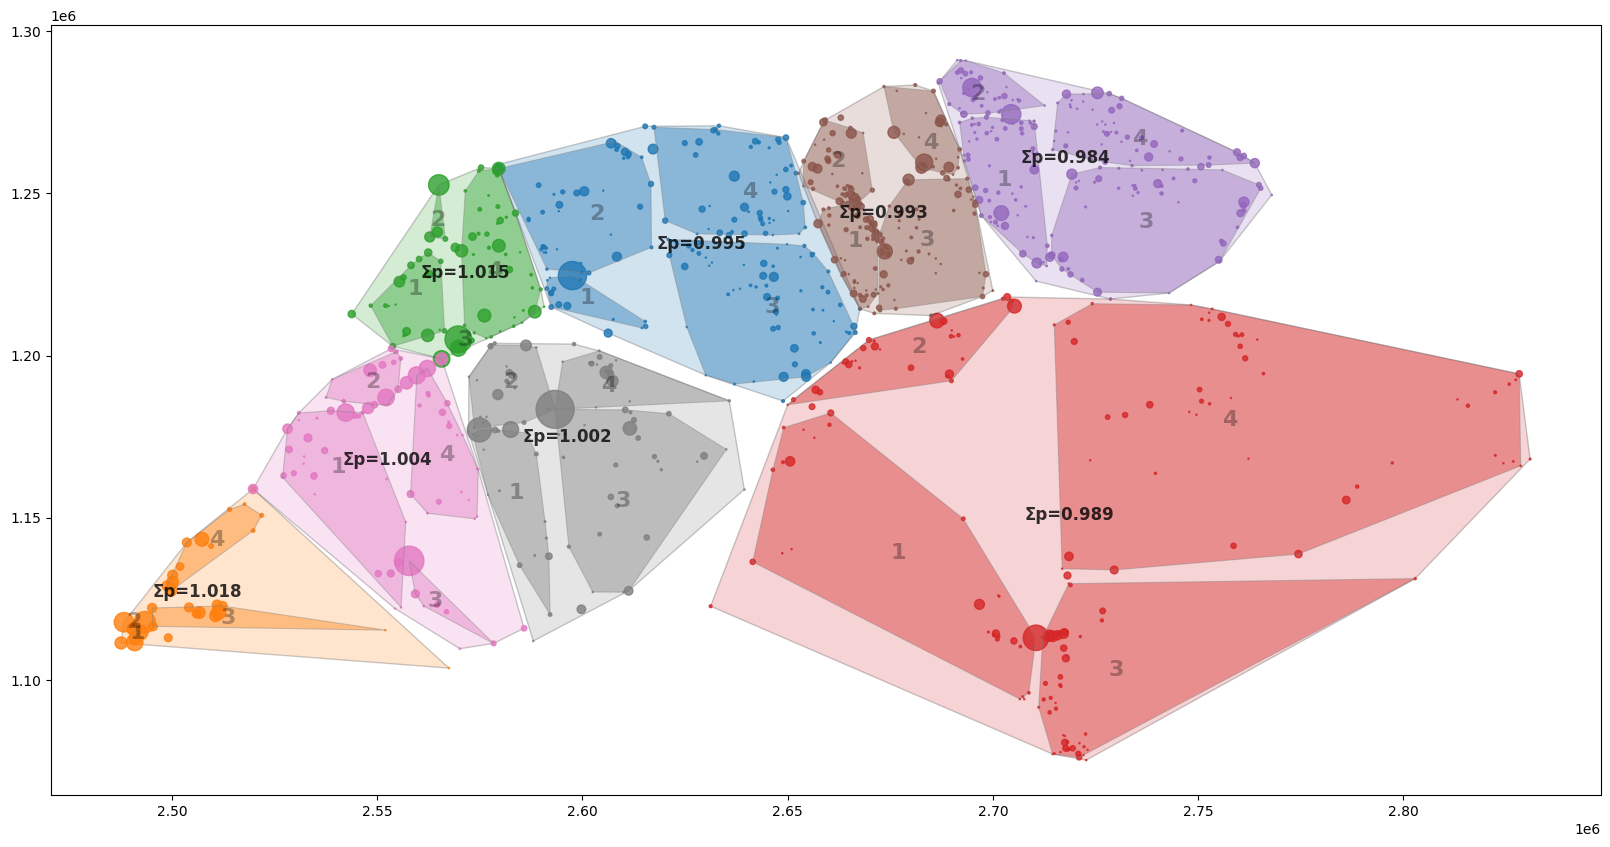

In [14]:
pop_hard.plot(figsize=(20, 10))